In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt',names=['Variance','Skewness','Curtosis','Entropy','Class'])

In [22]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df.isnull().sum()

Vaiance     0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [12]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Vaiance     1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [14]:
df['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

C:\Users\Nikhil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Nikhil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


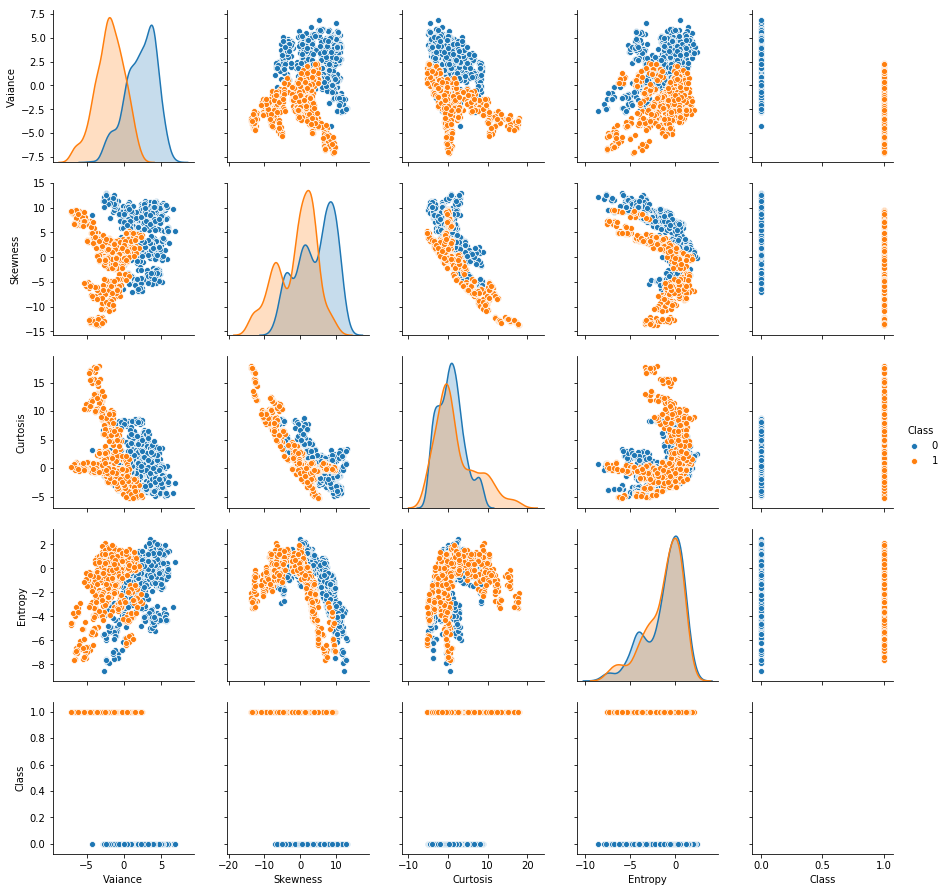

In [18]:
sns.pairplot(df,hue='Class')

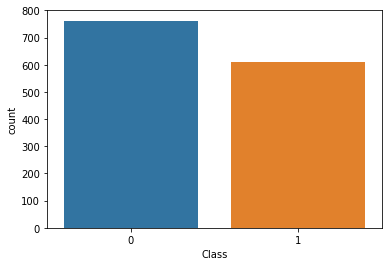

In [16]:
sns.countplot('Class',data=df)

C:\Users\Nikhil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


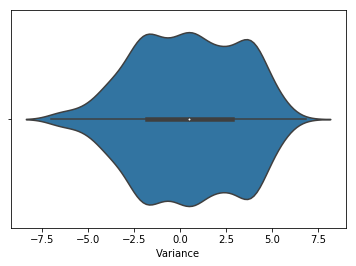

In [27]:
sns.violinplot('Variance',data=df)

C:\Users\Nikhil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


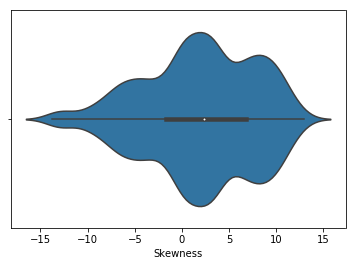

In [29]:
sns.violinplot('Skewness',data=df)

C:\Users\Nikhil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


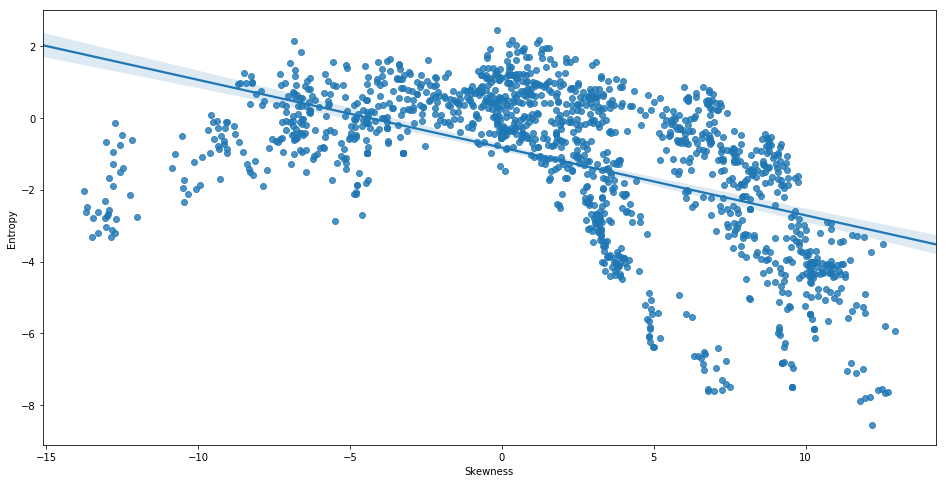

In [40]:
plt.figure(figsize=(16,8))
sns.regplot('Skewness','Entropy',data=df)

C:\Users\Nikhil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


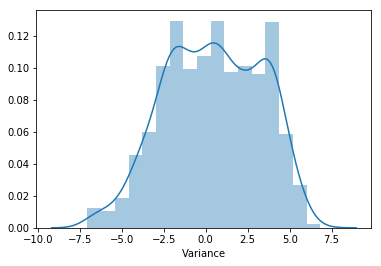

In [44]:
sns.distplot(df['Variance'])

C:\Users\Nikhil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


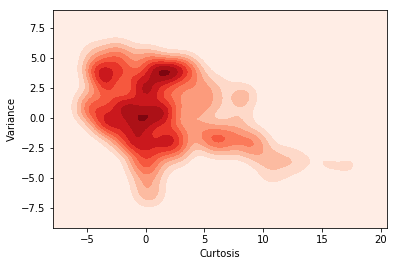

In [56]:
sns.kdeplot(df['Curtosis'],df['Variance'],cmap='Reds',shade=True)

In [57]:
x = df.iloc[:,:-1]

In [58]:
x.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [59]:
y = df.iloc[:,-1]

In [60]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=.2,random_state=41)

In [64]:
train_x.shape

(1097, 4)

In [65]:
test_x.shape

(275, 4)

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_x,train_y)
pred_lr = lr.predict(test_x)
print(accuracy_score(test_y,pred_lr))

0.9890909090909091


In [73]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
pred_gnb = gnb.predict(test_x)
print(accuracy_score(test_y,pred_gnb))

0.8218181818181818


In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x,train_y)
pred_rf = rf.predict(test_x)
print(accuracy_score(test_y,pred_rf))

1.0


In [76]:
# RandomForest is giving 100% accuracy

In [77]:
print(confusion_matrix(test_y,pred_rf))

[[148   0]
 [  0 127]]


In [78]:
print(classification_report(test_y,pred_rf))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       148
          1       1.00      1.00      1.00       127

avg / total       1.00      1.00      1.00       275



In [79]:
from sklearn.metrics import roc_curve,roc_auc_score

In [80]:
fin_pred = rf.predict_proba(test_x)[:,1]
print(fin_pred)

[1.  1.  1.  1.  1.  0.9 0.9 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
 1.  0.  1.  0.9 0.  0.  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.
 0.9 0.  0.1 1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.
 1.  0.  0.  0.  0.1 1.  1.  0.1 1.  0.  1.  0.9 0.  0.  0.  0.  1.  1.
 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.9 0.  0.  0.  0.  0.9
 0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.9 1.  1.  0.  0.  1.  1.  1.
 1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.
 1.  1.  0.9 0.1 0.  0.  0.9 0.  1.  1.  0.  0.  0.  1.  1.  0.  0.9 0.
 0.  1.  0.8 0.  1.  1.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.9 0.  1.
 0.  1.  1.  0.  0.  0.2 0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.9 0.
 0.  0.  1.  1.  1.  0.  1.  1.  0.  1.  0.1 1.  1.  1.  0.  0.9 0.  0.
 1.  1.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  1.
 0.8 0.  0.  0.1 1.  0.  0.  0.  0.  1.  0.2 1.  1.  0.1 0.  0.  1.  1.
 0.  0.  0.  0.  1.  0.  0.9 0.  0.  0.9 1.  0.9 0.  0.9 1.  0.

In [81]:
fpr,tpr,threshold = roc_curve(test_y,fin_pred)

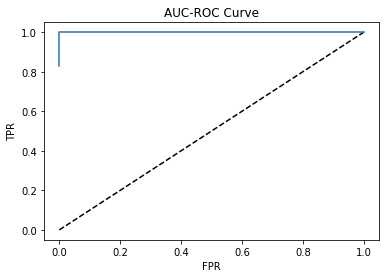

In [82]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC Curve')
plt.show()

In [83]:
sc = roc_auc_score(test_y,pred_rf)
print(sc)

1.0


In [84]:
import pickle

In [86]:
fd = open('bank.obj','wb')
pickle.dump(rf,fd)
fd.close()

In [87]:
fl = open('bank.obj','rb')
result = pickle.load(fl)
fl.close()

In [88]:
print(result.score(train_x,train_y))

1.0
